# Comparing hand labels to DEG results

In [1]:
import pandas as pd
import os
from pathlib import Path
from animal_soup import *

2023-06-28 15:40:46.475542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 15:40:46.922166: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/clewis7/repos/animal-soup/animal_soup/batch_utils.py:148: UserWarning: registration of accessor <class 'animal_soup.batch_utils.PathsDataFrameExtension'> under name 'paths' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("paths")
/home/clewis7/repos/animal-soup/animal_soup/batch_utils.py:153: UserWarning: registration of accessor <class 'animal_soup.batch_utils.PathsSeriesExtension'> under name 'paths' for type <class 'pandas.core.series.Series'> i

In [2]:
set_parent_raw_data_path('/data/caitlin/deep_ethogram/testing_vids/')

PosixPath('/data/caitlin/deep_ethogram/testing_vids')

In [3]:
df = load_df('/data/caitlin/deep_ethogram/testing_df_final.hdf')

In [31]:
container = df.behavior.compare_ethograms()
container.show()

/home/clewis7/venvs/mescore/lib/python3.11/site-packages/ipydatagrid/datagrid.py:445: UserWarning: Index name of 'index' is not round-trippable.
  schema = pd.io.json.build_table_schema(dataframe)


RFBOutputContext()

/home/clewis7/repos/mesmerize-core/mesmerize_core/arrays/_video.py:125: UserWarning: min not implemented for LazyTiff, returning min of 0th index
  warn("min not implemented for LazyTiff, returning min of 0th index")
/home/clewis7/repos/mesmerize-core/mesmerize_core/arrays/_video.py:130: UserWarning: max not implemented for LazyTiff, returning min of 0th index
  warn("max not implemented for LazyTiff, returning min of 0th index")


RFBOutputContext()

RFBOutputContext()

In [47]:
container.ethogram_array[0].sum()

0

In [5]:
ground = pd.read_hdf('/data/caitlin/ground_truth/ground_truth_694.hdf')

In [6]:
ground

,animal_id,session_id,ethograms,type,notes
0,M232Slc17a7_Gtacr2,20170314,"{'M232_20170314_v029': [[0.0, 0.0, 0.0, 0.0, 0...",table,[]
1,M232Slc17a7_Gtacr2,20170307,"{'M232_20170307_v064': [[0.0, 0.0, 0.0, 0.0, 0...",table,[]
2,M232Slc17a7_Gtacr2,20170306,"{'M232_20170306_v074': [[0.0, 0.0, 0.0, 0.0, 0...",table,[]
3,M232Slc17a7_Gtacr2,20170308,"{'M232_20170308_v034': [[0.0, 0.0, 0.0, 0.0, 0...",table,[]
4,M232Slc17a7_Gtacr2,20170310,"{'M232_20170310_v013': [[0, 0, 0, 0, 0, 0, 0, ...",table,[]
...,...,...,...,...,...
169,M240Slc17a7_Chr2,20170810,"{'M240_20170810_v059': [[0.0, 0.0, 0.0, 0.0, 0...",table,None
170,M240Slc17a7_Chr2,20170919,"{'M240_20170919_v130': [[0.0, 0.0, 0.0, 0.0, 0...",table,None
171,M240Slc17a7_Chr2,20170921,"{'M240_20170921_v101': [[0.0, 0.0, 0.0, 0.0, 0...",table,None
172,M240Slc17a7_Chr2,20170925,"{'M240_20170925_v024': [[0.0, 0.0, 0.0, 0.0, 0...",table,None


In [22]:
from tqdm import tqdm
import numpy as np

In [19]:
list(ground.iloc[0]["ethograms"].values())[0][0]

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
ETHOGRAM_BEHAVIOR_MAPPING = {
    "lift": 0,
    "handopen": 1,
    "grab": 2,
    "sup": 3,
    "atmouth": 4,
    "chew": 5,
}

In [50]:
def get_behavior_duration(row: pd.Series, behavior):
    durations = list()
    trial_ethograms = list(row["ethograms"].values())
    
    for trial_ethogram in trial_ethograms:
        duration = trial_ethogram[ETHOGRAM_BEHAVIOR_MAPPING[behavior]].sum()
        durations.append(int(duration))
        
    return durations

In [52]:
for behavior in list(ETHOGRAM_BEHAVIOR_MAPPING.keys()):
    ground[f"duration_{behavior}"] = ground.apply(lambda row: get_behavior_duration(row, behavior), axis=1)

In [53]:
ground

,animal_id,session_id,ethograms,type,notes,duration_lift,duration_handopen,duration_grab,duration_sup,duration_atmouth,duration_chew
0,M232Slc17a7_Gtacr2,20170314,"{'M232_20170314_v029': [[0.0, 0.0, 0.0, 0.0, 0...",table,[],"[29, 32, 27, 40]","[28, 27, 31, 65]","[41, 35, 63, 233]","[126, 109, 68, 272]","[173, 111, 102, 0]","[98, 56, 65, 0]"
1,M232Slc17a7_Gtacr2,20170307,"{'M232_20170307_v064': [[0.0, 0.0, 0.0, 0.0, 0...",table,[],"[58, 36, 35, 31, 47, 36]","[125, 29, 18, 72, 49, 53]","[320, 14, 61, 53, 62, 38]","[181, 151, 196, 103, 101, 136]","[0, 201, 39, 129, 132, 43]","[0, 21, 40, 94, 13, 44]"
2,M232Slc17a7_Gtacr2,20170306,"{'M232_20170306_v074': [[0.0, 0.0, 0.0, 0.0, 0...",table,[],"[83, 44, 48, 55, 54, 31, 45, 34, 41, 35]","[65, 108, 26, 63, 21, 32, 54, 53, 46, 29]","[99, 333, 119, 90, 42, 54, 92, 61, 75, 33]","[103, 0, 164, 61, 96, 186, 92, 102, 82, 162]","[93, 0, 277, 151, 95, 121, 134, 105, 125, 52]","[15, 0, 56, 23, 11, 56, 0, 45, 15, 35]"
3,M232Slc17a7_Gtacr2,20170308,"{'M232_20170308_v034': [[0.0, 0.0, 0.0, 0.0, 0...",table,[],"[26, 54, 81, 49, 38, 36, 58, 43, 43, 47, 38, 115]","[39, 40, 71, 35, 19, 25, 15, 49, 37, 20, 31, 78]","[145, 76, 281, 115, 74, 88, 98, 60, 64, 108, 9...","[199, 68, 118, 156, 93, 161, 155, 129, 116, 75...","[200, 34, 143, 34, 159, 97, 80, 265, 104, 131,...","[28, 0, 24, 114, 26, 14, 19, 35, 19, 64, 32, 0]"
4,M232Slc17a7_Gtacr2,20170310,"{'M232_20170310_v013': [[0, 0, 0, 0, 0, 0, 0, ...",table,[],"[31, 37]","[32, 40]","[46, 52]","[121, 77]","[157, 99]","[9, 20]"
...,...,...,...,...,...,...,...,...,...,...,...
169,M240Slc17a7_Chr2,20170810,"{'M240_20170810_v059': [[0.0, 0.0, 0.0, 0.0, 0...",table,None,[10],[21],[27],[64],[34],[12]
170,M240Slc17a7_Chr2,20170919,"{'M240_20170919_v130': [[0.0, 0.0, 0.0, 0.0, 0...",table,None,[16],[31],[28],[61],[124],[67]
171,M240Slc17a7_Chr2,20170921,"{'M240_20170921_v101': [[0.0, 0.0, 0.0, 0.0, 0...",table,None,[36],[33],[56],[73],[144],[106]
172,M240Slc17a7_Chr2,20170925,"{'M240_20170925_v024': [[0.0, 0.0, 0.0, 0.0, 0...",table,None,"[32, 23]","[68, 22]","[89, 69]","[280, 61]","[86, 179]","[0, 58]"


In [155]:
shortest_behaviors = {k: np.inf for k in list(ETHOGRAM_BEHAVIOR_MAPPING.keys())}

for behavior in list(ETHOGRAM_BEHAVIOR_MAPPING.keys()):
    durations = ground[f"duration_{behavior}"].apply(min)
    
    shortest_behaviors[behavior] = durations[durations > 1].min()

In [167]:
from matplotlib import pyplot as plt

(array([415., 184.,  64.,  21.,   4.,   3.,   2.,   0.,   0.,   1.]),
 array([  8. ,  30.5,  53. ,  75.5,  98. , 120.5, 143. , 165.5, 188. ,
        210.5, 233. ]),
 <BarContainer object of 10 artists>)

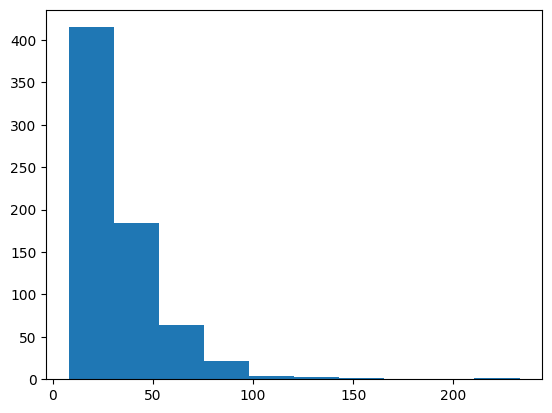

In [169]:
plt.hist(np.concatenate(ground["duration_lift"].values))

In [156]:
shortest_behaviors

{'lift': 8, 'handopen': 4, 'grab': 8, 'sup': 11, 'atmouth': 11, 'chew': 7}

In [70]:
duration_sup = ground["duration_sup"].apply(min)

In [150]:
duration_sup[duration_sup == 1]

28    1
57    1
Name: duration_sup, dtype: int64

In [82]:
ground.iloc[28]

animal_id                                           M234Slc17a7_Gtacr2
session_id                                                    20170329
ethograms            {'M234_20170329_v069': [[0.0, 0.0, 0.0, 0.0, 0...
type                                                             table
notes                                                               []
duration_lift        [94, 87, 56, 68, 42, 33, 36, 53, 31, 43, 61, 7...
duration_handopen    [59, 42, 91, 103, 86, 75, 133, 74, 140, 93, 78...
duration_grab        [30, 30, 45, 47, 41, 26, 43, 32, 34, 39, 74, 5...
duration_sup         [208, 225, 188, 98, 199, 203, 165, 194, 192, 2...
duration_atmouth     [90, 168, 142, 153, 145, 264, 142, 111, 237, 1...
duration_chew        [51, 57, 16, 15, 18, 64, 42, 10, 40, 10, 27, 8...
Name: 28, dtype: object

In [75]:
set_parent_raw_data_path('/data/caitlin/ground_truth/')

PosixPath('/data/caitlin/ground_truth')

In [100]:
ground_viz = ground.behavior.view()
ground_viz.show()

/home/clewis7/venvs/mescore/lib/python3.11/site-packages/ipydatagrid/datagrid.py:445: UserWarning: Index name of 'index' is not round-trippable.
  schema = pd.io.json.build_table_schema(dataframe)


RFBOutputContext()

/home/clewis7/repos/mesmerize-core/mesmerize_core/arrays/_video.py:125: UserWarning: min not implemented for LazyTiff, returning min of 0th index
  warn("min not implemented for LazyTiff, returning min of 0th index")
/home/clewis7/repos/mesmerize-core/mesmerize_core/arrays/_video.py:130: UserWarning: max not implemented for LazyTiff, returning min of 0th index
  warn("max not implemented for LazyTiff, returning min of 0th index")


RFBOutputContext()

In [101]:
np.where(ground_viz.ethogram_array[3])

(array([515]),)

In [102]:
ground_viz.plot["sup"].colors = "cyan"

In [104]:
datapoint = ground_viz.plot["sup"].data[515]

In [105]:
ground_viz.plot["sup"].data = np.array([np.nan])

/home/clewis7/repos/fastplotlib/fastplotlib/graphics/_features/_base.py:34: UserWarning: converting float64 array to float32
  warn(f"converting {array.dtype} array to float32")


In [146]:
ground_viz.plot["sup"].data = np.zeros(ground_viz.ethogram_array.shape[1])

In [147]:
data = ground_viz.plot["sup"].data()

In [ ]:
~(data[:, 0] > 515).astype(bool)

In [148]:
ground_viz.plot["sup"].data[~(data[:, 0] > 515).astype(bool)] = np.array([np.nan])

In [107]:
datapoint

array([ 0., nan,  0.], dtype=float32)